In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing data
df= pd.read_csv('C:/Users/A K Fuley/Downloads/Capstone/VLT data.csv')
df.head()

,UNIQUEID,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


#EDA

In [2]:
print(df.shape)          #checking for no of rows and columns in the dataset

(233154, 41)


In [3]:
df.isna().sum()         #checking for presenc of null values ,if any

UNIQUEID                                  0
DISBURSED_AMOUNT                          0
ASSET_COST                                0
LTV                                       0
BRANCH_ID                                 0
SUPPLIER_ID                               0
MANUFACTURER_ID                           0
CURRENT_PINCODE_ID                        0
DATE_OF_BIRTH                             0
EMPLOYMENT_TYPE                        7661
DISBURSAL_DATE                            0
STATE_ID                                  0
EMPLOYEE_CODE_ID                          0
MOBILENO_AVL_FLAG                         0
AADHAR_FLAG                               0
PAN_FLAG                                  0
VOTERID_FLAG                              0
DRIVING_FLAG                              0
PASSPORT_FLAG                             0
PERFORM_CNS_SCORE                         0
PERFORM_CNS_SCORE_DESCRIPTION             0
PRI_NO_OF_ACCTS                           0
PRI_ACTIVE_ACCTS                

Most of the missing values are present in the EMPLOYMENT_TYPE, lets calculate the percentage of missing values to determine how to treat it.

In [4]:
missing_values= df['EMPLOYMENT_TYPE'].isna().sum()
total_values= len(df['EMPLOYMENT_TYPE'])
Percent_isna= (missing_values/total_values)*100
print(Percent_isna)

3.2858110948128703


In [5]:
df.dtypes                        #data types of the column

UNIQUEID                                 int64
DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
DATE_OF_BIRTH                           object
EMPLOYMENT_TYPE                         object
DISBURSAL_DATE                          object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACC

C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='EMPLOYMENT_TYPE', ylabel='count'>

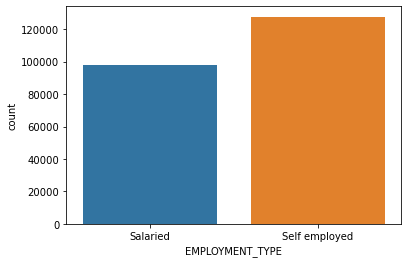

In [6]:
df['EMPLOYMENT_TYPE'].value_counts()                #check the count of categories in EMPLOYMENT_TYPE column

sns.countplot(df['EMPLOYMENT_TYPE'])

<AxesSubplot:>

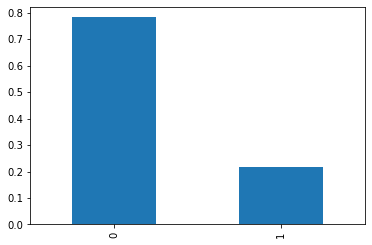

In [7]:
#Checking if the data is balanced or imbalanced
import matplotlib.pyplot as plt
df['LOAN_DEFAULT'].value_counts(normalize=True).plot(kind='bar')

Its an imbalanced dataset. 80% of the data is for not default loans and only 20% is for default loan transaction.

count    233154.000000
mean      54356.993528
std       12971.314171
min       13320.000000
25%       47145.000000
50%       53803.000000
75%       60413.000000
max      990572.000000
Name: DISBURSED_AMOUNT, dtype: float64


C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DISBURSED_AMOUNT', ylabel='Density'>

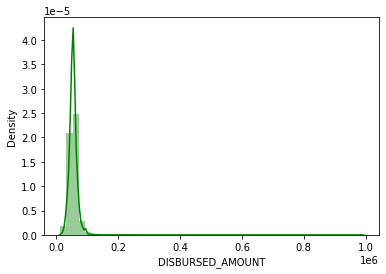

In [8]:
print(df['DISBURSED_AMOUNT'].describe())
sns.distplot(df['DISBURSED_AMOUNT'],color='Green')

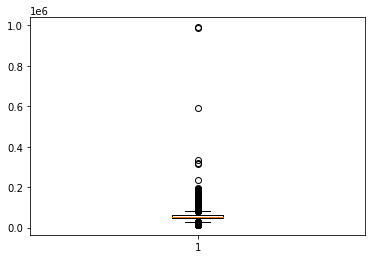

In [9]:
plt.boxplot(df['DISBURSED_AMOUNT'])
plt.show()

count    2.331540e+05
mean     7.586507e+04
std      1.894478e+04
min      3.700000e+04
25%      6.571700e+04
50%      7.094600e+04
75%      7.920175e+04
max      1.628992e+06
Name: ASSET_COST, dtype: float64


C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ASSET_COST', ylabel='Density'>

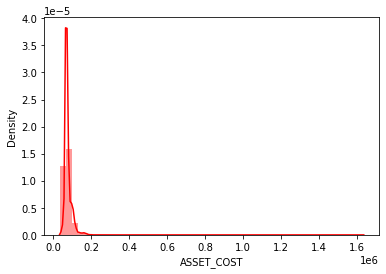

In [10]:
print(df['ASSET_COST'].describe())
sns.distplot(df['ASSET_COST'],color='Red')

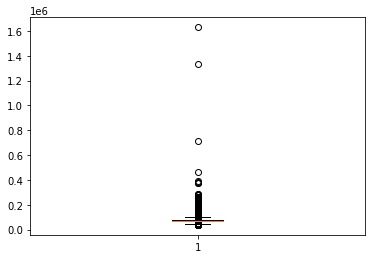

In [11]:
plt.boxplot(df['ASSET_COST'])
plt.show()

C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LTV', ylabel='Density'>

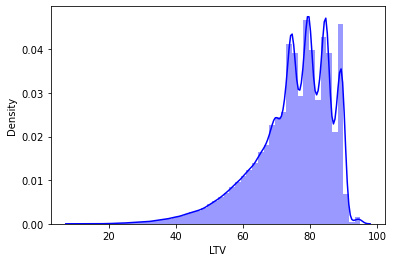

In [12]:
sns.distplot(df['LTV'], color='blue')

C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='LTV'>

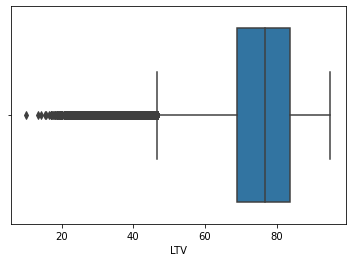

In [13]:
sns.boxplot(df['LTV'])

C:\Users\A K Fuley\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PERFORM_CNS_SCORE', ylabel='Density'>

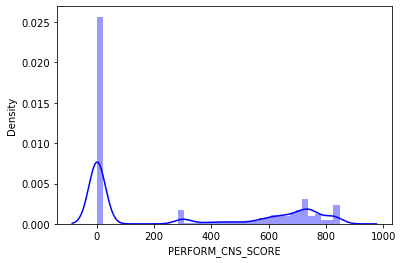

In [14]:
sns.distplot(df['PERFORM_CNS_SCORE'],color='blue')

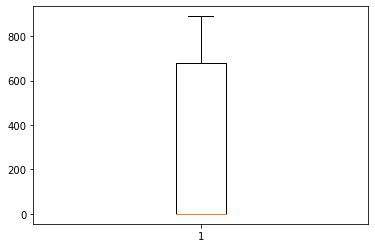

In [15]:
plt.boxplot(df['PERFORM_CNS_SCORE'])
plt.show()

In [16]:
df['PERFORM_CNS_SCORE_DESCRIPTION'].value_counts(normalize=False)

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

Lets perform auto eda with sweetviz for quicker analysis

In [17]:
!pip install sweetviz

In [18]:
import sweetviz as sv
# generate a report
report = sv.analyze(df)

# display the report
report.show_html('SweetVIZ report.html')

                                             |                                             | [  0%]   00:00 ->…

Report SweetVIZ report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


#Lets do some bivariate boxplot analysis

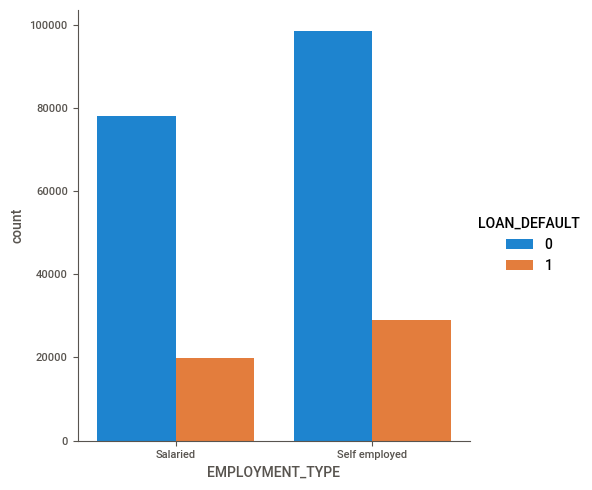

In [19]:
sns.catplot(data=df,kind='count',x='EMPLOYMENT_TYPE',hue='LOAN_DEFAULT')

Text(0, 0.5, 'Column Values')

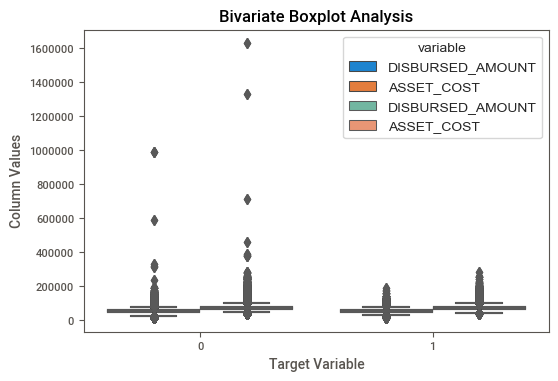

In [20]:

x = 'LOAN_DEFAULT'
y = ['DISBURSED_AMOUNT', 'ASSET_COST'] # specify the columns you want to analyze
new_data = pd.melt(df[y + [x]], id_vars=[x], value_vars=y)
sns.boxplot(x=x, y='value', hue='variable', data=new_data)
sns.set_style('whitegrid')
sns.set_palette('Set2')

sns.boxplot(x=x, y='value', hue='variable', data=new_data)

plt.title('Bivariate Boxplot Analysis')
plt.xlabel('Target Variable')
plt.ylabel('Column Values')


#Data Preprocessing

Since the EMPLOYMENT_TYPE contains more than 4% of missing values , we will not be dropping that data. Rather, we shall be performing mode imputation

In [21]:
# fill missing values in Employment Type column with mode
employment_mode = df['EMPLOYMENT_TYPE'].mode()[0]
df['EMPLOYMENT_TYPE'].fillna(employment_mode, inplace=True)

# print the imputed dataframe
print(df.isna().sum())

UNIQUEID                               0
DISBURSED_AMOUNT                       0
ASSET_COST                             0
LTV                                    0
BRANCH_ID                              0
SUPPLIER_ID                            0
MANUFACTURER_ID                        0
CURRENT_PINCODE_ID                     0
DATE_OF_BIRTH                          0
EMPLOYMENT_TYPE                        0
DISBURSAL_DATE                         0
STATE_ID                               0
EMPLOYEE_CODE_ID                       0
MOBILENO_AVL_FLAG                      0
AADHAR_FLAG                            0
PAN_FLAG                               0
VOTERID_FLAG                           0
DRIVING_FLAG                           0
PASSPORT_FLAG                          0
PERFORM_CNS_SCORE                      0
PERFORM_CNS_SCORE_DESCRIPTION          0
PRI_NO_OF_ACCTS                        0
PRI_ACTIVE_ACCTS                       0
PRI_OVERDUE_ACCTS                      0
PRI_CURRENT_BALA

In [22]:
#Dropping the rest of the rows with missing values(very very small percent of data)
df=df.dropna()

Unique id column cannot add any value while model building , so dropping the unique id column

In [23]:
df=df.drop('UNIQUEID',axis=1)


#Transforming the date type columns into numerical format

1. Convert the columns AVERAGE_ACCT_AGE and CREDIT_HISTORY_LENGTH column data into numerical data.
2. Seperating the Date_of_Birth and Disbursal_date data into days, month , and year columns.

In [24]:
# Function to convert "yrs mon" format to a float value
def convert_to_float(x):
    years, months = x.split()
    return float(years[:-3]) + float(months[:-3])/12

# Apply the function to the 'AVERAGE_ACCT_AGE' and 'CREDIT_HISTORY_LENGTH' column
df['AVERAGE_ACCT_AGE'] = df['AVERAGE_ACCT_AGE'].apply(convert_to_float)
df['CREDIT_HISTORY_LENGTH'] = df['CREDIT_HISTORY_LENGTH'].apply(convert_to_float)

# Display the dataframe with the new column
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,DISBURSAL_DATE,...,SEC_SANCTIONED_AMOUNT,SEC_DISBURSED_AMOUNT,PRIMARY_INSTAL_AMT,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT
0,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,03-08-2018,...,0,0,0,0,0,0,0.000000,0.000000,0,0
1,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,26-09-2018,...,0,0,1991,0,0,1,1.916667,1.916667,0,1
2,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,01-08-2018,...,0,0,0,0,0,0,0.000000,0.000000,0,0
3,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,26-10-2018,...,0,0,31,0,0,0,0.666667,1.250000,1,1
4,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,26-09-2018,...,0,0,0,0,0,0,0.000000,0.000000,1,1


In [25]:
# Convert the 'date' column to datetime format
df['DISBURSAL_DATE'] = pd.to_datetime(df['DISBURSAL_DATE'])

# Extract the year, month, and day as numerical columns
df['DISBURSAL_year'] = df['DISBURSAL_DATE'].dt.year
df['DISBURSAL_month'] = df['DISBURSAL_DATE'].dt.month
df['DISBURSAL_day'] = df['DISBURSAL_DATE'].dt.day

#Dropping the original DISBURSAL_DATE column
df= df.drop('DISBURSAL_DATE', axis=1)

# Display the dataframe with the new columns
print(df)


        DISBURSED_AMOUNT  ASSET_COST    LTV  BRANCH_ID  SUPPLIER_ID  \
0                  50578       58400  89.55         67        22807   
1                  47145       65550  73.23         67        22807   
2                  53278       61360  89.63         67        22807   
3                  57513       66113  88.48         67        22807   
4                  52378       60300  88.39         67        22807   
...                  ...         ...    ...        ...          ...   
233149             63213      105405  60.72         34        20700   
233150             73651      100600  74.95         34        23775   
233151             33484       71212  48.45         77        22186   
233152             34259       73286  49.10         77        22186   
233153             75751      116009  66.81         77        22186   

        MANUFACTURER_ID  CURRENT_PINCODE_ID DATE_OF_BIRTH EMPLOYMENT_TYPE  \
0                    45                1441    01-01-1984        Salar

Using DATE_OF_BIRTH column, we will get a new column 'AGE' which will determine the age of the loan holders.

In [26]:
import datetime as dt
df['AGE'] = ((dt.date.today() - pd.to_datetime(df['DATE_OF_BIRTH']).dt.date).dt.days) / 365.25
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,DATE_OF_BIRTH,EMPLOYMENT_TYPE,STATE_ID,...,NEW_ACCTS_IN_LAST_SIX_MONTHS,DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS,AVERAGE_ACCT_AGE,CREDIT_HISTORY_LENGTH,NO_OF_INQUIRIES,LOAN_DEFAULT,DISBURSAL_year,DISBURSAL_month,DISBURSAL_day,AGE
0,50578,58400,89.55,67,22807,45,1441,01-01-1984,Salaried,6,...,0,0,0.000000,0.000000,0,0,2018,3,8,39.200548
1,47145,65550,73.23,67,22807,45,1502,31-07-1985,Self employed,6,...,0,1,1.916667,1.916667,0,1,2018,9,26,37.620808
2,53278,61360,89.63,67,22807,45,1497,24-08-1985,Self employed,6,...,0,0,0.000000,0.000000,0,0,2018,1,8,37.555099
3,57513,66113,88.48,67,22807,45,1501,30-12-1993,Self employed,6,...,0,0,0.666667,1.250000,1,1,2018,10,26,29.204654
4,52378,60300,88.39,67,22807,45,1495,09-12-1977,Self employed,6,...,0,0,0.000000,0.000000,1,1,2018,9,26,45.503080


In [27]:
#I don't want to keep the Date of Birth column since i already got the age of the loan defaulter
df=df.drop('DATE_OF_BIRTH',axis=1)

In [28]:
df.columns

Index(['DISBURSED_AMOUNT', 'ASSET_COST', 'LTV', 'BRANCH_ID', 'SUPPLIER_ID',
       'MANUFACTURER_ID', 'CURRENT_PINCODE_ID', 'EMPLOYMENT_TYPE', 'STATE_ID',
       'EMPLOYEE_CODE_ID', 'MOBILENO_AVL_FLAG', 'AADHAR_FLAG', 'PAN_FLAG',
       'VOTERID_FLAG', 'DRIVING_FLAG', 'PASSPORT_FLAG', 'PERFORM_CNS_SCORE',
       'PERFORM_CNS_SCORE_DESCRIPTION', 'PRI_NO_OF_ACCTS', 'PRI_ACTIVE_ACCTS',
       'PRI_OVERDUE_ACCTS', 'PRI_CURRENT_BALANCE', 'PRI_SANCTIONED_AMOUNT',
       'PRI_DISBURSED_AMOUNT', 'SEC_NO_OF_ACCTS', 'SEC_ACTIVE_ACCTS',
       'SEC_OVERDUE_ACCTS', 'SEC_CURRENT_BALANCE', 'SEC_SANCTIONED_AMOUNT',
       'SEC_DISBURSED_AMOUNT', 'PRIMARY_INSTAL_AMT', 'SEC_INSTAL_AMT',
       'NEW_ACCTS_IN_LAST_SIX_MONTHS', 'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS',
       'AVERAGE_ACCT_AGE', 'CREDIT_HISTORY_LENGTH', 'NO_OF_INQUIRIES',
       'LOAN_DEFAULT', 'DISBURSAL_year', 'DISBURSAL_month', 'DISBURSAL_day',
       'AGE'],
      dtype='object')

In [29]:
df.dtypes

DISBURSED_AMOUNT                         int64
ASSET_COST                               int64
LTV                                    float64
BRANCH_ID                                int64
SUPPLIER_ID                              int64
MANUFACTURER_ID                          int64
CURRENT_PINCODE_ID                       int64
EMPLOYMENT_TYPE                         object
STATE_ID                                 int64
EMPLOYEE_CODE_ID                         int64
MOBILENO_AVL_FLAG                        int64
AADHAR_FLAG                              int64
PAN_FLAG                                 int64
VOTERID_FLAG                             int64
DRIVING_FLAG                             int64
PASSPORT_FLAG                            int64
PERFORM_CNS_SCORE                        int64
PERFORM_CNS_SCORE_DESCRIPTION           object
PRI_NO_OF_ACCTS                          int64
PRI_ACTIVE_ACCTS                         int64
PRI_OVERDUE_ACCTS                        int64
PRI_CURRENT_B

#Encoding categorical column

First, we shall encode the Perform_CNS_SCORE_DESCRIPTION colun which contains a lot of categories with no order. So, we shall be using binary encoder to encode the column. 

In [30]:
from sklearn.preprocessing import LabelBinarizer
# initialize LabelBinarizer object
lb = LabelBinarizer()

# fit and transform the 'color' column
binary_data = lb.fit_transform(df['PERFORM_CNS_SCORE_DESCRIPTION'])

# create a new dataframe with binary encoding
binary_df = pd.DataFrame(binary_data, columns=lb.classes_)

# concatenate the original dataframe with the new binary dataframe
df = pd.concat([df, binary_df], axis=1)
df

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,50578,58400,89.55,67,22807,45,1441,Salaried,6,1998,...,0,0,0,1,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,Self employed,6,1998,...,0,0,0,0,0,0,0,0,0,0
2,53278,61360,89.63,67,22807,45,1497,Self employed,6,1998,...,0,0,0,1,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,Self employed,6,1998,...,0,1,0,0,0,0,0,0,0,0
4,52378,60300,88.39,67,22807,45,1495,Self employed,6,1998,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,63213,105405,60.72,34,20700,48,1050,Salaried,6,3705,...,0,0,0,0,0,0,0,0,0,0
233150,73651,100600,74.95,34,23775,51,990,Self employed,6,3705,...,0,0,0,0,0,0,0,0,0,0
233151,33484,71212,48.45,77,22186,86,2299,Salaried,4,3479,...,0,0,0,1,0,0,0,0,0,0
233152,34259,73286,49.10,77,22186,86,2299,Salaried,4,3479,...,0,0,0,1,0,0,0,0,0,0


In [31]:
#Drop the PERFORM_CNS_SCORE_DESCRIPTION column from the dataframe
df= df.drop('PERFORM_CNS_SCORE_DESCRIPTION',axis=1)

For the EMPLOYMENT_TYPE column, since there are only 2 categories , we can use label encoding.

In [32]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# fit and transform the categorical column
df['EMPLOYMENT_TYPE'] = le.fit_transform(df['EMPLOYMENT_TYPE'])

# print the encoded dataframe
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,BRANCH_ID,SUPPLIER_ID,MANUFACTURER_ID,CURRENT_PINCODE_ID,EMPLOYMENT_TYPE,STATE_ID,EMPLOYEE_CODE_ID,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,50578,58400,89.55,67,22807,45,1441,0,6,1998,...,0,0,0,1,0,0,0,0,0,0
1,47145,65550,73.23,67,22807,45,1502,1,6,1998,...,0,0,0,0,0,0,0,0,0,0
2,53278,61360,89.63,67,22807,45,1497,1,6,1998,...,0,0,0,1,0,0,0,0,0,0
3,57513,66113,88.48,67,22807,45,1501,1,6,1998,...,0,1,0,0,0,0,0,0,0,0
4,52378,60300,88.39,67,22807,45,1495,1,6,1998,...,0,0,0,1,0,0,0,0,0,0


In [33]:
df['EMPLOYMENT_TYPE'].dtypes

dtype('int32')

I feel BRANCH_ID,SUPPLier_ID, MANUFACTURER_ID, CURRENT_PINCODE_ID, STATE_ID,EMPLOYEE_CODE_ID are some of the unnecessary columns present in the data which does not affect the target variable.So, we can remove them.

In [34]:
df=df.drop(columns=['BRANCH_ID','SUPPLIER_ID','MANUFACTURER_ID','CURRENT_PINCODE_ID','STATE_ID','EMPLOYEE_CODE_ID'])
df.head()

,DISBURSED_AMOUNT,ASSET_COST,LTV,EMPLOYMENT_TYPE,MOBILENO_AVL_FLAG,AADHAR_FLAG,PAN_FLAG,VOTERID_FLAG,DRIVING_FLAG,PASSPORT_FLAG,...,K-High Risk,L-Very High Risk,M-Very High Risk,No Bureau History Available,Not Scored: More than 50 active Accounts found,Not Scored: No Activity seen on the customer (Inactive),Not Scored: No Updates available in last 36 months,Not Scored: Not Enough Info available on the customer,Not Scored: Only a Guarantor,Not Scored: Sufficient History Not Available
0,50578,58400,89.55,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,47145,65550,73.23,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,53278,61360,89.63,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,57513,66113,88.48,1,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,52378,60300,88.39,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [35]:
df.dtypes

DISBURSED_AMOUNT                                             int64
ASSET_COST                                                   int64
LTV                                                        float64
EMPLOYMENT_TYPE                                              int32
MOBILENO_AVL_FLAG                                            int64
AADHAR_FLAG                                                  int64
PAN_FLAG                                                     int64
VOTERID_FLAG                                                 int64
DRIVING_FLAG                                                 int64
PASSPORT_FLAG                                                int64
PERFORM_CNS_SCORE                                            int64
PRI_NO_OF_ACCTS                                              int64
PRI_ACTIVE_ACCTS                                             int64
PRI_OVERDUE_ACCTS                                            int64
PRI_CURRENT_BALANCE                                          i

#Splitting the dataset

In [36]:
y= df['LOAN_DEFAULT']
X= df.drop('LOAN_DEFAULT',axis=1)
print(y.shape, X.shape)

(233154,) (233154, 54)


In [37]:
# convert y to a 1-dimensional array
y = y.ravel()

#Random Forest Feature Selection

In [38]:
from sklearn.ensemble import RandomForestClassifier
# Initialize a random forest classifier
rf = RandomForestClassifier()

# Fit the classifier to the data
rf.fit(X, y)

# Get the feature importances
importances = rf.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Print the feature importances
print(feature_importances)

                                              feature    importance
2                                                 LTV  1.457843e-01
33                                                AGE  1.411520e-01
1                                          ASSET_COST  1.409041e-01
0                                    DISBURSED_AMOUNT  1.382794e-01
32                                      DISBURSAL_day  7.742491e-02
31                                    DISBURSAL_month  3.726560e-02
28                              CREDIT_HISTORY_LENGTH  2.945377e-02
14                                PRI_CURRENT_BALANCE  2.876643e-02
15                              PRI_SANCTIONED_AMOUNT  2.791912e-02
27                                   AVERAGE_ACCT_AGE  2.762840e-02
16                               PRI_DISBURSED_AMOUNT  2.760498e-02
23                                 PRIMARY_INSTAL_AMT  2.712737e-02
10                                  PERFORM_CNS_SCORE  2.700463e-02
11                                    PRI_NO_OF_

Based on the importance of the features, we can further remove some columns while training.

In [39]:
X= X.drop(columns=['MOBILENO_AVL_FLAG','DISBURSAL_year'])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)


Since this is an imbalanced dataset , we can perform 3 things to balance the distribution of classes while training;

1. Upsampling- Randomly increasing the minority class in the training set.
2. Downsampling- Randomly decreasing the majority class in the training set.
3. SMOTE- Synthetic Minority Over-sampling Technique involves generating synthetic instances of the minority class in the training set to balance the class distribution.

Since, our dataset is inclined towards not default, chances of true negatives predictions are high. Hence, we shall use upsampling to balance the classes.

In [41]:
!pip install imblearn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.0.1
    Uninstalling joblib-1.0.1:
      Successfully uninstalled joblib-1.0.1


In [42]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)


#Normalization

In [43]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform it
X_train_norm = scaler.fit_transform(X_train)
X_train_norm= pd.DataFrame(X_train_norm)
X_test_norm = scaler.transform(X_test)
X_test_norm= pd.DataFrame(X_test_norm)

#Model Training

In [44]:
#Importing necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [45]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_norm, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_norm, y_train)

# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_norm, y_train)


C:\Users\A K Fuley\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNeighborsClassifier()

#Model Evaluation

In [46]:
# Logistic Regression
y_pred_lr = lr.predict(X_test_norm)
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_lr))
print('Classification Report:\n', classification_report(y_test, y_pred_lr))

# Decision Tree
y_pred_dt = dt.predict(X_test_norm)
print('Decision Tree:')
print('Accuracy:', accuracy_score(y_test, y_pred_dt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_dt))
print('Classification Report:\n', classification_report(y_test, y_pred_dt))

# Random Forest
y_pred_rf = rf.predict(X_test_norm)
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_rf))
print('Classification Report:\n', classification_report(y_test, y_pred_rf))

# K-Nearest Neighbors
y_pred_knn = knn.predict(X_test_norm)
print('K-Nearest Neighbors:')
print('Accuracy:', accuracy_score(y_test, y_pred_knn))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_knn))
print('Classification Report:\n', classification_report(y_test, y_pred_knn))


Logistic Regression:
Accuracy: 0.5656751946130256
Confusion Matrix:
 [[19928 16577]
 [ 3676  6450]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.55      0.66     36505
           1       0.28      0.64      0.39     10126

    accuracy                           0.57     46631
   macro avg       0.56      0.59      0.53     46631
weighted avg       0.72      0.57      0.60     46631

Decision Tree:
Accuracy: 0.6692972486114387
Confusion Matrix:
 [[28603  7902]
 [ 7519  2607]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.79     36505
           1       0.25      0.26      0.25     10126

    accuracy                           0.67     46631
   macro avg       0.52      0.52      0.52     46631
weighted avg       0.67      0.67      0.67     46631

Random Forest:
Accuracy: 0.7641697583152838
Confusion Matrix:
 [[34565  1940]
 [ 9057  1069]]
Classifica

In [47]:
from sklearn.metrics import roc_auc_score

print("AUC-ROC score for logistic regression:",roc_auc_score(y_test, y_pred_lr))
print("AUC-ROC score for decision tree :",roc_auc_score(y_test, y_pred_dt))
print("AUC-ROC score for random forest:",roc_auc_score(y_test, y_pred_rf))
print("AUC-ROC score for KNN:",roc_auc_score(y_test, y_pred_knn))


AUC-ROC score for logistic regression: 0.5914359741141902
AUC-ROC score for decision tree : 0.5204962777860753
AUC-ROC score for random forest: 0.5262132076258266
AUC-ROC score for KNN: 0.5301422241380304


#Thus we see that Random Forest is giving us the best accuracy of 77.68 %.